In [43]:
library (Seurat)

library (dplyr)
library(ggplot2)
library(patchwork) # for arranging plots

library (viridisLite)
library (RColorBrewer)

In [44]:
# load the Seurat object
path_RNA_combined  <- "7_Article/results/tab_seurat_correct/RNA_combined.rds"
RNA_combined <- readRDS(path_RNA_combined)

path_RNA_combined_join  <- "7_Article/results/tab_seurat_correct/RNA_combined_join.rds"
RNA_combined_join <- readRDS(path_RNA_combined_join)

path_RNA_rep1  <- "7_Article/results/tab_seurat_correct/RNA_rep1.rds"
RNA_rep1 <- readRDS(path_RNA_rep1)

path_RNA_rep2  <- "7_Article/results/tab_seurat_correct/RNA_rep2.rds"
RNA_rep2 <- readRDS(path_RNA_rep2)


info sur la fonction FeatureScatter :

https://satijalab.org/seurat/reference/featurescatter

FeatureScatter(
  object,       # Objet Seurat contenant les données de single-cell RNA-seq.
  feature1,     # Premier paramètre à représenter sur l'axe X (expression d'un gène, métrique, PC score...).
  feature2,     # Deuxième paramètre à représenter sur l'axe Y.

  cells = NULL,     # Liste des cellules à inclure dans le scatter plot (par défaut, toutes les cellules).
  shuffle = FALSE,  # Si TRUE, mélange aléatoirement les points pour éviter qu'ils se chevauchent.
  seed = 1,         # Fixe la graine aléatoire pour la reproductibilité (utile avec shuffle = TRUE).

  group.by = NULL,  # Nom d'une colonne des métadonnées pour colorer les cellules (ex : "orig.ident").
  split.by = NULL,  # Colonne des métadonnées pour séparer le graphique en plusieurs sous-groupes.
  cols = NULL,      # Couleurs utilisées pour afficher les différentes classes d'identité.

  pt.size = 1,      # Taille des points sur le graphique.
  shape.by = NULL,  # (Non utilisé actuellement).

  span = NULL,      # Si défini, ajoute un lissage Loess (Spline) aux données.
  smooth = FALSE,   # Ajoute un effet de lissage sur le scatter plot (similaire à `smoothScatter`).

  combine = TRUE,   # Si TRUE, combine plusieurs graphiques en un seul (sinon, retourne une liste de ggplots).

  slot = "data",    # Emplacement des données dans l'objet Seurat : "counts", "data" ou "scale.data".
  plot.cor = TRUE,  # Affiche la corrélation entre feature1 et feature2 dans le titre du graphique.

  ncol = NULL,      # Nombre de colonnes si plusieurs graphiques sont affichés.

  raster = NULL,        # Convertit les points en format raster (utile pour les grands jeux de données).
  raster.dpi = c(512, 512),  # Résolution en pixels des plots rasterisés.

  jitter = FALSE,  # Ajoute du jitter (légère dispersion aléatoire des points) pour mieux visualiser les points superposés.
  log = FALSE      # Si TRUE, applique une échelle logarithmique aux axes.
)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



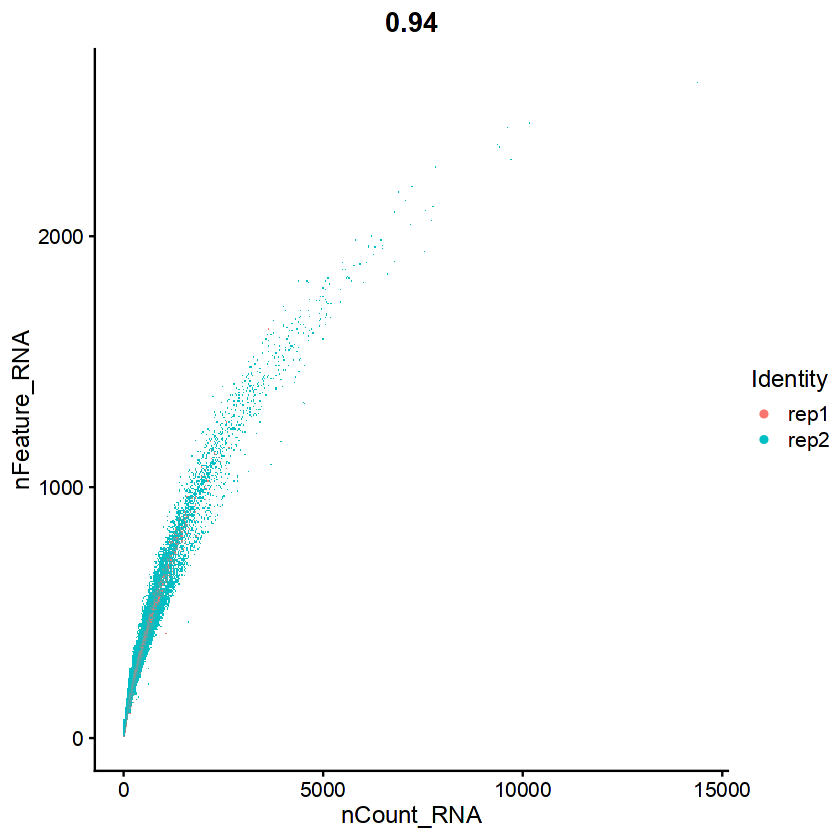

In [45]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot_feature_scatter <- FeatureScatter(RNA_combined, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",  group.by = "rep")
plot_feature_scatter

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



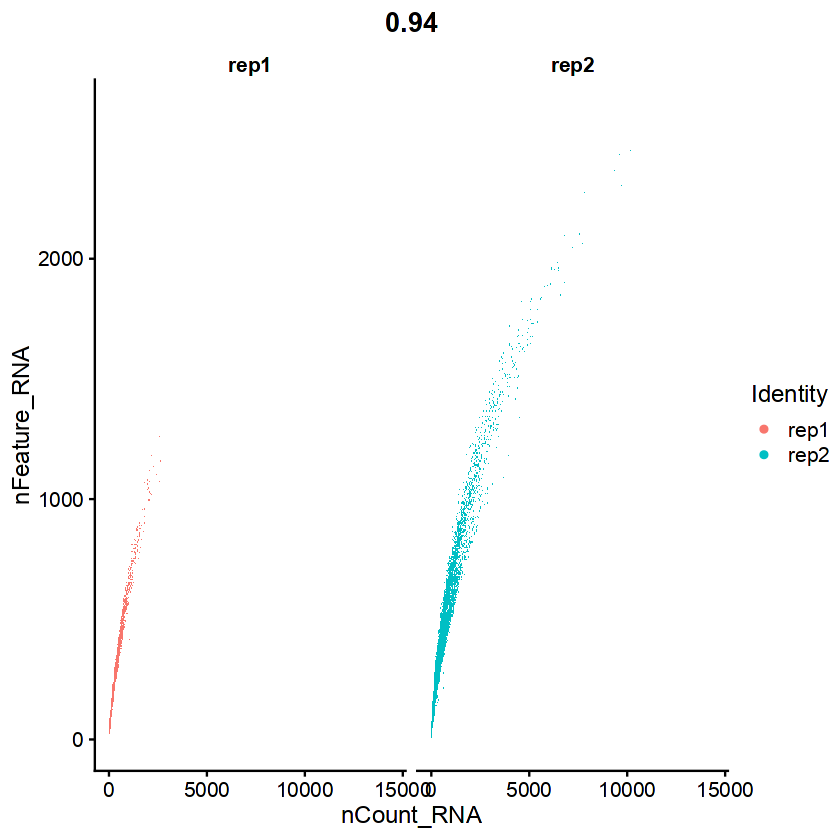

In [46]:
plot_feature_scatter <- FeatureScatter(RNA_combined, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",  group.by = "rep", split.by = "rep",  combine = FALSE)
plot_feature_scatter

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



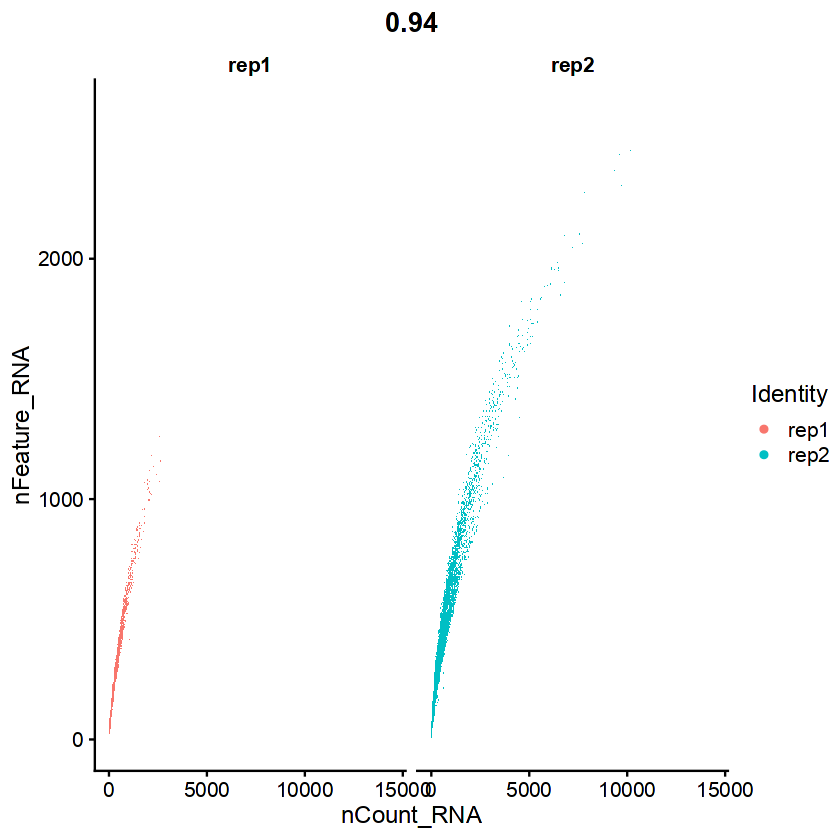

In [47]:
plot_feature_scatter <- FeatureScatter(RNA_combined, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",  group.by = "rep", split.by = "rep", combine = FALSE)
plot_feature_scatter

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



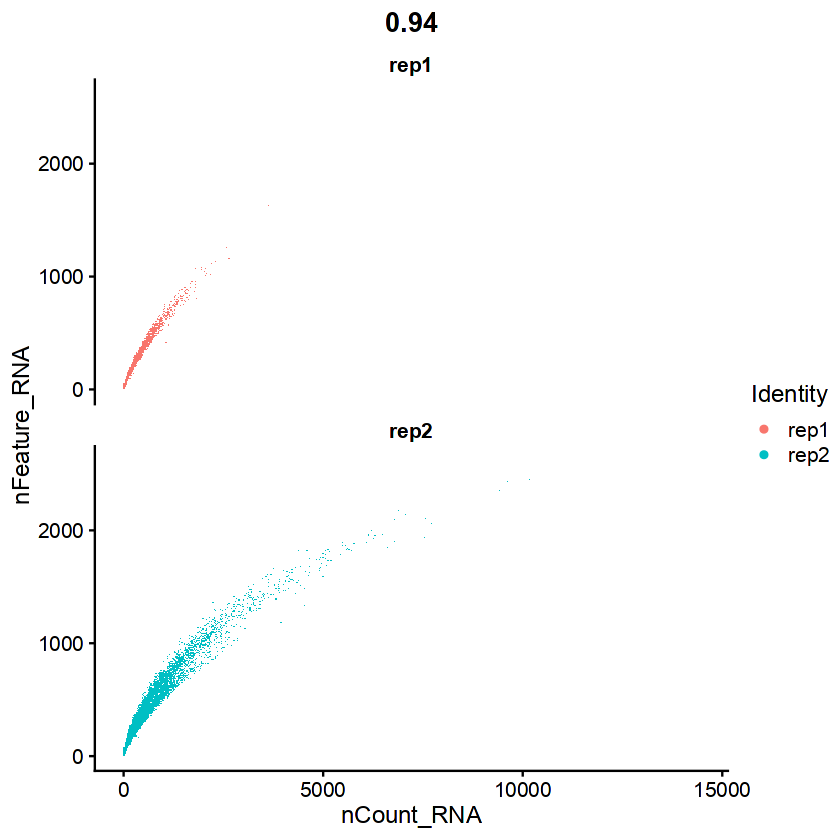

In [48]:
FeatureScatter(RNA_combined, 
               feature1 = "nCount_RNA", 
               feature2 = "nFeature_RNA",  
               group.by = "rep", 
               split.by = "rep", 
               combine = TRUE,
               ncol = 1
               )

Warning message in grepl(pattern = feature1, x = names(x = data)[1]):
“argument 'pattern' has length > 1 and only the first element will be used”
Warning message in grepl(pattern = feature2, x = names(x = data)[2]):
“argument 'pattern' has length > 1 and only the first element will be used”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



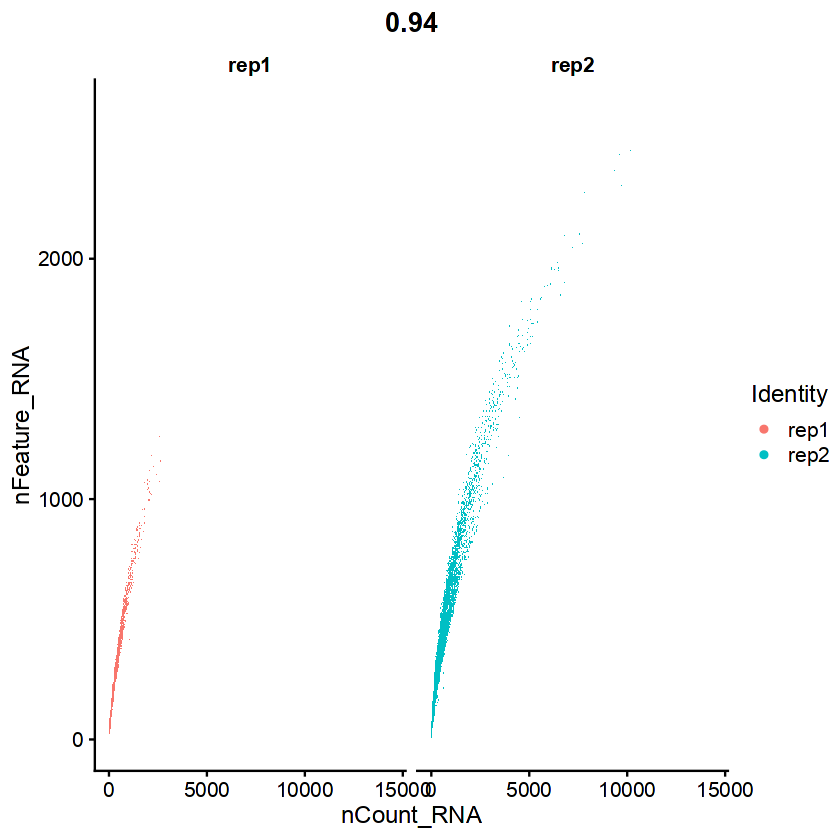

In [49]:
FeatureScatter(RNA_combined, 
               c("nCount_RNA", "nCount_RNA"),
               c("nFeature_RNA", "nFeature_RNA"),
               combine = TRUE, 
               group.by = "rep", 
               split.by = "rep")

RNA_combined <- subset(RNA_combined, subset = nFeature_RNA > 200 & nFeature_RNA < 1000 &  nCount_RNA > 1000)

In [50]:
head (RNA_combined)

,nCount_RNA,nFeature_RNA,rep,sublibrary,well,cond
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
rep1_AAACATCG_AACCGAGA_ACTCGTAA,0,0,rep1,M15,A1,OD0.5
rep1_AAACATCG_AACGCTTA_ACTCGTAA,0,0,rep1,M15,A1,OD0.5
rep1_AAACATCG_AACTCACC_ACTCGTAA,0,0,rep1,M15,A1,OD0.5
rep1_AAACATCG_AATCCGTC_ACTCGTAA,0,0,rep1,M15,A1,OD0.5
rep1_AAACATCG_ACAGATTC_ACTCGTAA,0,0,rep1,M15,A1,OD0.5
rep1_AAACATCG_AGCACCTC_ACTCGTAA,0,0,rep1,M15,A1,OD0.5
rep1_AAACATCG_AGCAGGAA_ACTCGTAA,0,0,rep1,M15,A1,OD0.5
rep1_AAACATCG_AGCCATGC_ACTCGTAA,0,0,rep1,M15,A1,OD0.5
rep1_AAACATCG_AGGCTAAC_ACTCGTAA,0,0,rep1,M15,A1,OD0.5


In [51]:
# Get all gene names in the Seurat object
gene_names <- rownames(RNA_combined)

# View the first few genes
head(gene_names, 20)

# Count how many genes you have
length(gene_names)

[1] "bs-dnaA"       "bs-dnaN"       "bs-rlbA"       "bs-recF"      
 [5] "bs-remB"       "bs-gyrB"       "bs-gyrA"       "bs-trnO-Ala"  
 [9] "bs-yaaC"       "bs-guaB"       "bs-dacA"       "bs-pdxS"      
[13] "bs-pdxT"       "bs-tboS"       "bs-serS"       "bs-trnSL-Ser1"
[17] "bs-dck"        "bs-dgk"        "bs-sleL"       "bs-yaaI"

[1] 4422

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



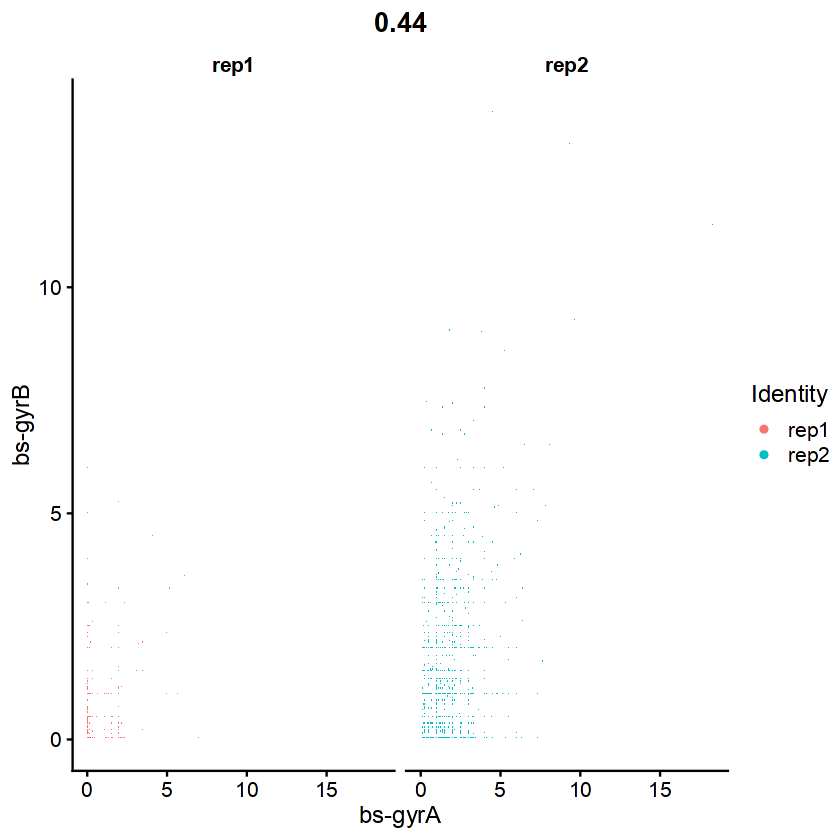

In [52]:
# For multiple gene pairs
FeatureScatter(
  object = RNA_combined,
  feature1 = c("bs-gyrA"),  # First genes in each pair
  feature2 = c( "bs-gyrB"),  # Second genes in each pair
  combine = FALSE  , # Combine into one multi-panel plot
  slot = "counts",   # Or "data", "scale.data", etc. based on what's available  
  group.by = "rep",  # Color by the "rep" metadata column                   
  split.by = "rep"   # Split by the "rep" metadata column
)

In [ ]:
j'ai l'impression que la methode combine = FALSE ne fonctionne pas et est inutile 